# **Visualisasi Data - Midterm**

**Muhammad Rieza Fachrezi - 1301204335**

COVID-19 Cases

## Penjelasan Dataset

Digunakan dataset COVID-19 yang memiliki fitur-fitur seperti:

*   **SNo**: ID observasi
*   **ObservationDate**: Tanggal diambilnya observasi
*   **Province/State**: Provinsi diambilnya observasi
*   **Country/Region**: Negara diambilnya observasi
*   **Last Update**: Waktu akhir observasi
*   **Confirmed**: Jumlah kasus COVID-19 yang ditemukan
*   **Deaths**: Jumlah kasus meninggal akibat COVID-19
*   **Recovered**: Jumlah pasien yang sembuh dari COVID-19

Dataset diambil dari rentang tanggal akhir Februari 2020 - akhir Mei 2021 dari berbagai negara dengan total 306.429 baris data. Dataset diambil dari https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset



## Import Libraries

Import library-library yang diperlukan

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

mpl.rcParams["axes.formatter.limits"] = (-99, 99)

## Import Dataset

Import dataset yang sudah diupload pada repository github dan tampilkan dataset tersebut

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/riezaf51/midterm-covid19/main/covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


Ubah tipe data pada kolom *ObservationDate* dari string menjadi datetime

In [55]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [56]:
df['Province/State'].fillna('Unknown', inplace=True)

## Visualisasi

### 1. Akumulasi Kasus COVID-19 di Indonesia

In [57]:
df_indonesia = df[df['Country/Region'] == 'Indonesia']
df_indonesia

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3114,3115,2020-03-02,Unknown,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3258,3259,2020-03-03,Unknown,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3421,3422,2020-03-04,Unknown,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3590,3591,2020-03-05,Unknown,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3760,3761,2020-03-06,Unknown,Indonesia,2020-03-06T12:33:03,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...
302674,302675,2021-05-25,Unknown,Indonesia,2021-05-26 04:20:35,1786187.0,49627.0,1642074.0
303439,303440,2021-05-26,Unknown,Indonesia,2021-05-27 04:20:59,1791221.0,49771.0,1645263.0
304204,304205,2021-05-27,Unknown,Indonesia,2021-05-28 04:20:36,1797499.0,49907.0,1649187.0
304969,304970,2021-05-28,Unknown,Indonesia,2021-05-29 04:20:41,1803361.0,50100.0,1654557.0


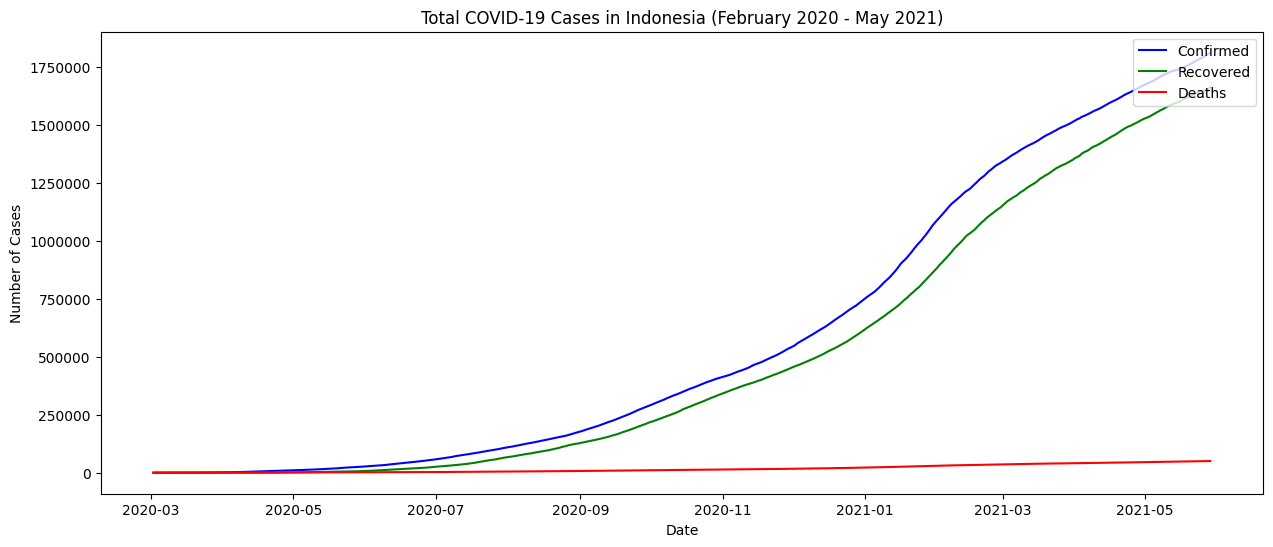

In [58]:
df_indonesia_per_day = df_indonesia.groupby('ObservationDate').sum(numeric_only=True).drop('SNo', axis=1)

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df_indonesia_per_day['Confirmed'], label='Confirmed', color='blue')
ax.plot(df_indonesia_per_day['Recovered'], label='Recovered', color='green')
ax.plot(df_indonesia_per_day['Deaths'], label='Deaths', color='red')
ax.set_title('Total COVID-19 Cases in Indonesia (February 2020 - May 2021)')
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Date')
ax.legend(loc='upper right')

plt.show()

Apabila dilihat dari grafik tersebut, bisa terlihat bahwa tren pasien sembuh mengikuti tren kasus COVID-19, hanya saja tren pasien sembuh cenderung 'terlambat' karena dibutuhkan waktu untuk pasien COVID untuk dirawat dan bisa sembuh.

### 2. Perbandingan Jumlah Kasus COVID-19 di Indonesia, Malaysia, dan Thailand

In [59]:
df_malay = df[df['Country/Region'] == 'Malaysia']
df_thai = df[df['Country/Region'] == 'Thailand']

df_malay_per_day = df_malay.groupby('ObservationDate').sum(numeric_only=True).drop('SNo', axis=1)
df_thai_per_day = df_thai.groupby('ObservationDate').sum(numeric_only=True).drop('SNo', axis=1)

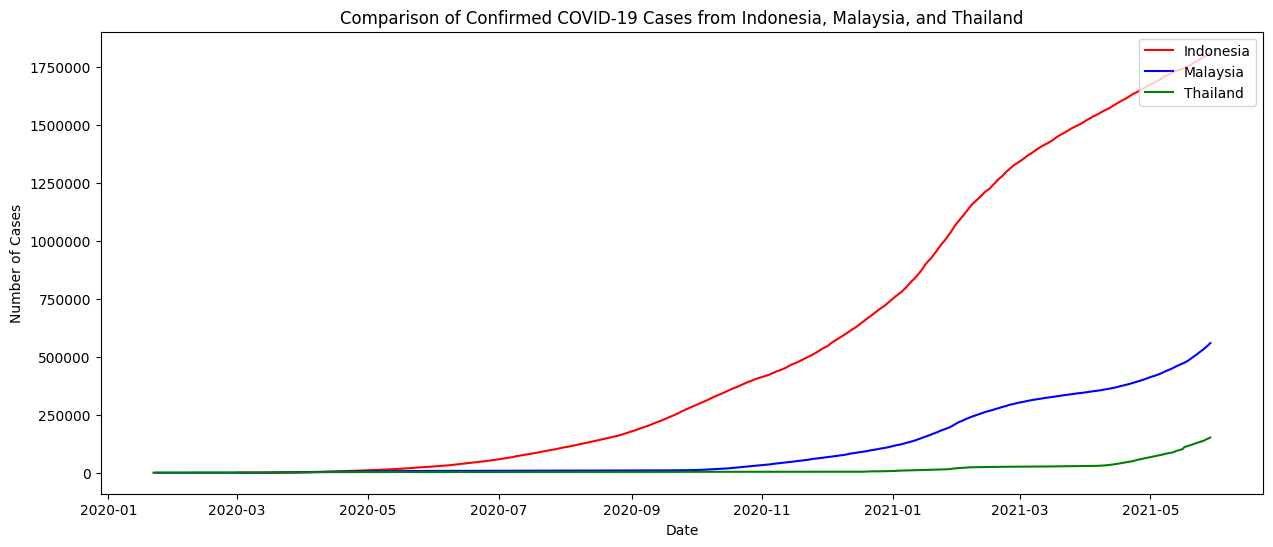

In [60]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(df_indonesia_per_day['Confirmed'], color='red', label='Indonesia')
ax.plot(df_malay_per_day['Confirmed'], color='blue', label='Malaysia')
ax.plot(df_thai_per_day['Confirmed'], color='green', label='Thailand')
ax.legend(loc='upper right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title('Comparison of Confirmed COVID-19 Cases from Indonesia, Malaysia, and Thailand')

plt.show()

Berdasarkan grafik di atas, didapat bahwa Indonesia yang memiliki populasi terbesar dibandingkan Malaysia dan Thailand mengalami lonjakan kasus yang lebih awal dan lebih banyak, sedangkan Malaysia yang memiliki populasi lebih kecil dari Thailand mengalami lonjakan kasus 4 bulan setelah Indonesia dan juga kasus yang jauh lebih banyak dibandingkan Thailand.

### 3. Barplot Total Kasus COVID-19 di Setiap Provinsi China

In [61]:
df_china = df[df['Country/Region'] == 'Mainland China']

df_china_per_state = df_china.groupby('Province/State').last()

In [62]:
df_china_per_state

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
Province/State,,,,,,,
Anhui,305859,2021-05-29,Mainland China,2021-05-30 04:20:55,1004.0,6.0,994.0
Beijing,305893,2021-05-29,Mainland China,2021-05-30 04:20:55,1059.0,9.0,1046.0
Chongqing,305943,2021-05-29,Mainland China,2021-05-30 04:20:55,598.0,6.0,586.0
Fujian,305985,2021-05-29,Mainland China,2021-05-30 04:20:55,620.0,1.0,588.0
Gansu,305990,2021-05-29,Mainland China,2021-05-30 04:20:55,194.0,2.0,192.0
Guangdong,306008,2021-05-29,Mainland China,2021-05-30 04:20:55,2432.0,8.0,2381.0
Guangxi,306009,2021-05-29,Mainland China,2021-05-30 04:20:55,275.0,2.0,268.0
Guizhou,306012,2021-05-29,Mainland China,2021-05-30 04:20:55,147.0,2.0,145.0
Hainan,306015,2021-05-29,Mainland China,2021-05-30 04:20:55,188.0,6.0,181.0


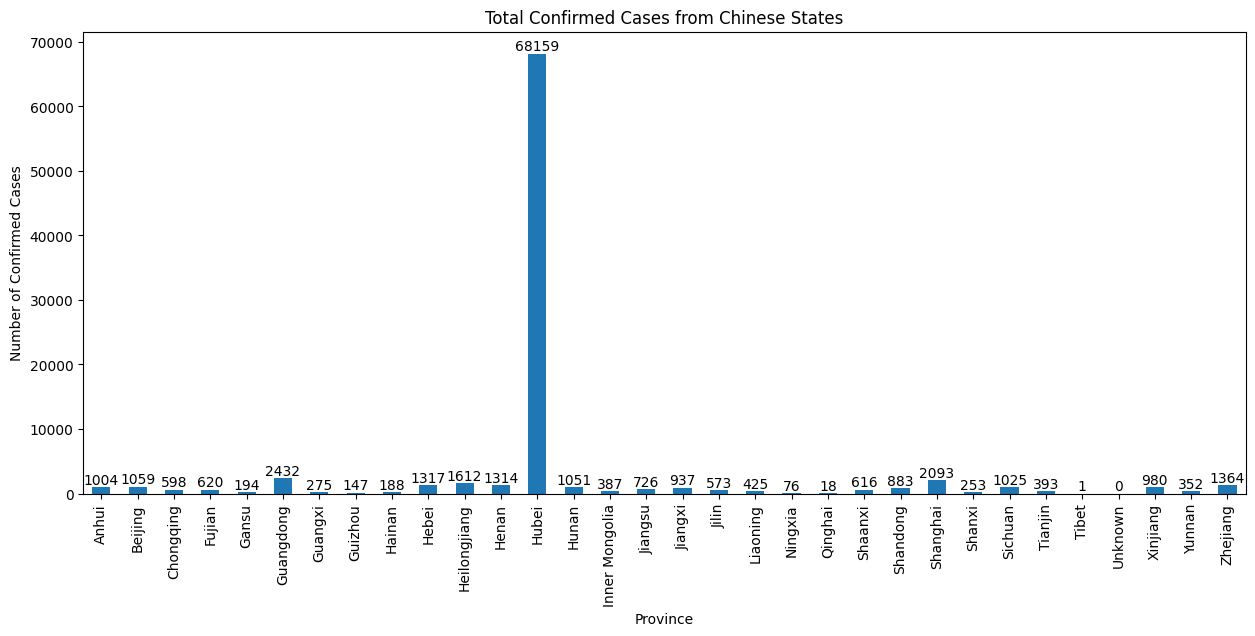

In [63]:
ax = df_china_per_state['Confirmed'].plot(kind='bar', figsize=(15,6))

ax.bar_label(ax.containers[-1], fmt = '%d')

plt.xlabel('Province')
plt.ylabel('Number of Confirmed Cases')
plt.title('Total Confirmed Cases from Chinese States')

plt.show()

Berdasarkan Barplot di atas, didapat bahwa Provinsi Hubei merupakan provinsi yang mengalami kasus COVID-19 terbanyak dibandingkan provinsi-provinsi di China lainnya. Ini merupakan hal yang masuk akal dikarenakan pada Provinsi Hubei terdapat Kota Wuhan yang merupakan episentrum COVID-19.

### 4. Barplot Total Kasus COVID-19 Seluruh Negara

In [65]:
df_countries = pd.DataFrame(columns=('Confirmed', 'Deaths', 'Recovered'))
for country in df['Country/Region'].unique():
  df_temp = pd.DataFrame(df[df['Country/Region'] == country].groupby('Province/State').last().sum(numeric_only=True)).T
  df_temp.index = [country]
  df_temp.drop('SNo', axis=1, inplace=True)
  df_countries = pd.concat([df_countries, df_temp])

df_countries.sort_values(['Confirmed'], inplace=True, ascending=False)

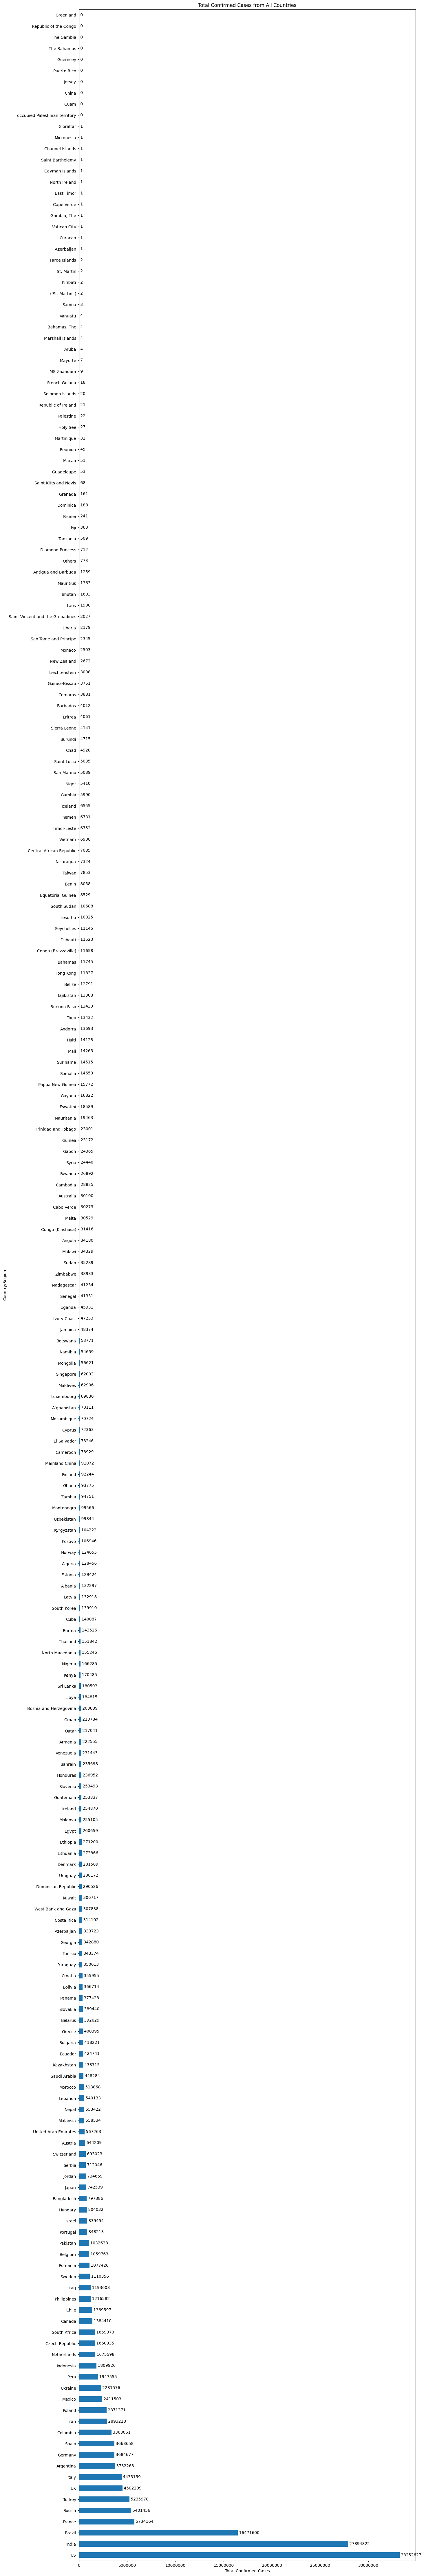

In [49]:
ax = df_countries['Confirmed'].plot(kind='barh', figsize=(15,0.5 * len(df_countries)))

ax.bar_label(ax.containers[-1], fmt = ' %d')

plt.ylabel('Country/Region')
plt.xlabel('Total Confirmed Cases')
plt.title('Total Confirmed Cases from All Countries')

plt.show()

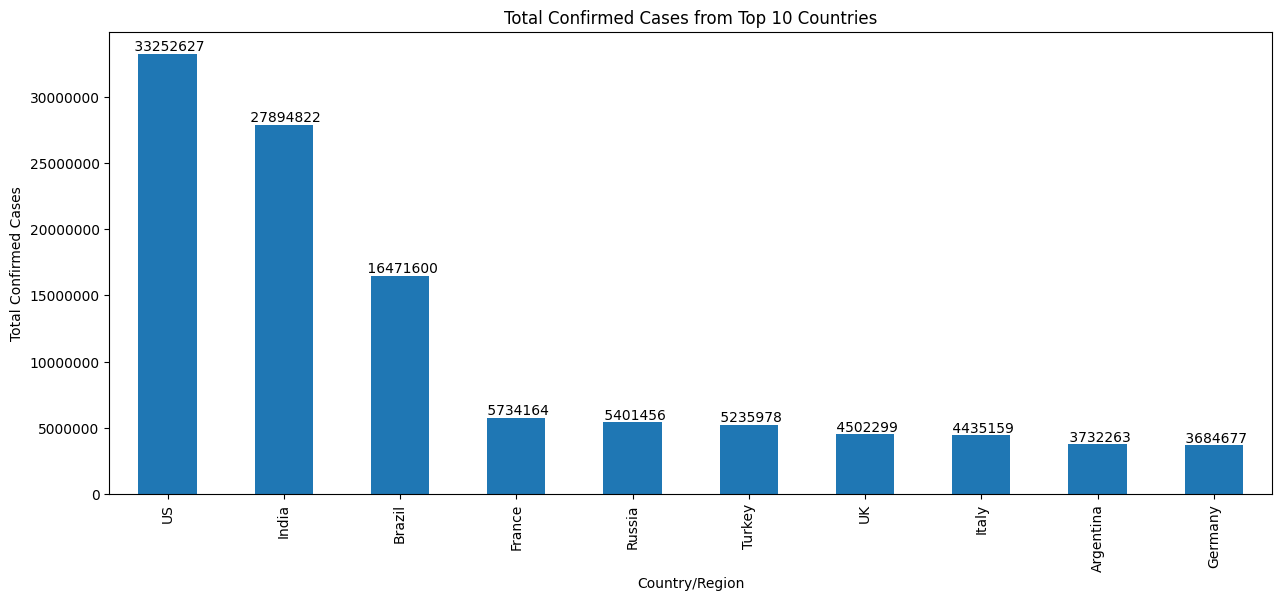

In [50]:
ax = df_countries.head(10)['Confirmed'].plot(kind='bar', figsize=(15,6))

ax.bar_label(ax.containers[-1], fmt = ' %d')

plt.xlabel('Country/Region')
plt.ylabel('Total Confirmed Cases')
plt.title('Total Confirmed Cases from Top 10 Countries')

plt.show()

Berdasarkan Bar plot di atas, didapat bahwa negara yang mengalami kasus COVID-19 terbesar adalah Amerika Serikat yang disusul oleh India dan Brazil.

### 5. Mortality Rate dari Seluruh Negara

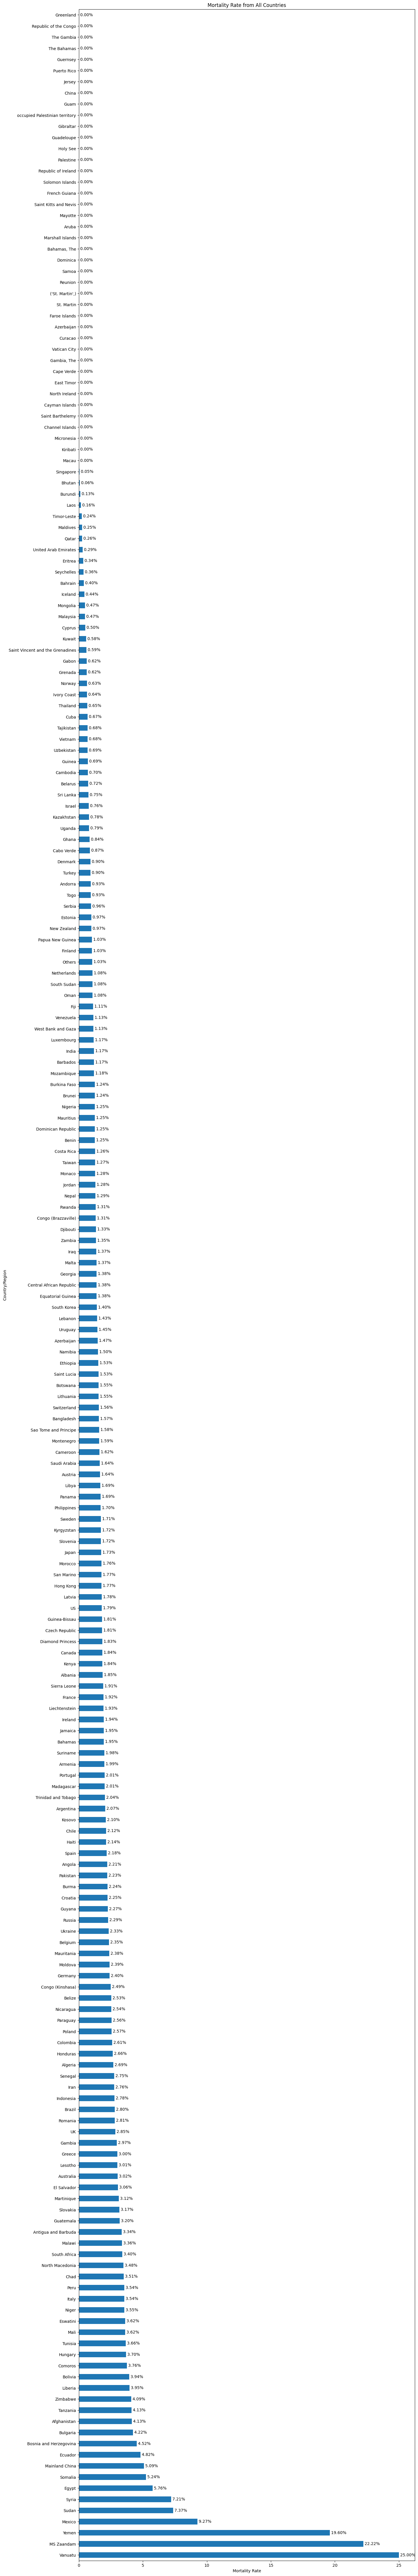

In [51]:
df_countries['Mortality Rate'] = df_countries['Deaths']/df_countries['Confirmed']

ax = (df_countries.sort_values('Mortality Rate', ascending=False)['Mortality Rate']*100).plot(kind='barh', figsize=(15,0.5 * len(df_countries)))

ax.bar_label(ax.containers[-1], fmt = ' %.2f%%')

plt.ylabel('Country/Region')
plt.xlabel('Mortality Rate')
plt.title('Mortality Rate from All Countries')

plt.show()

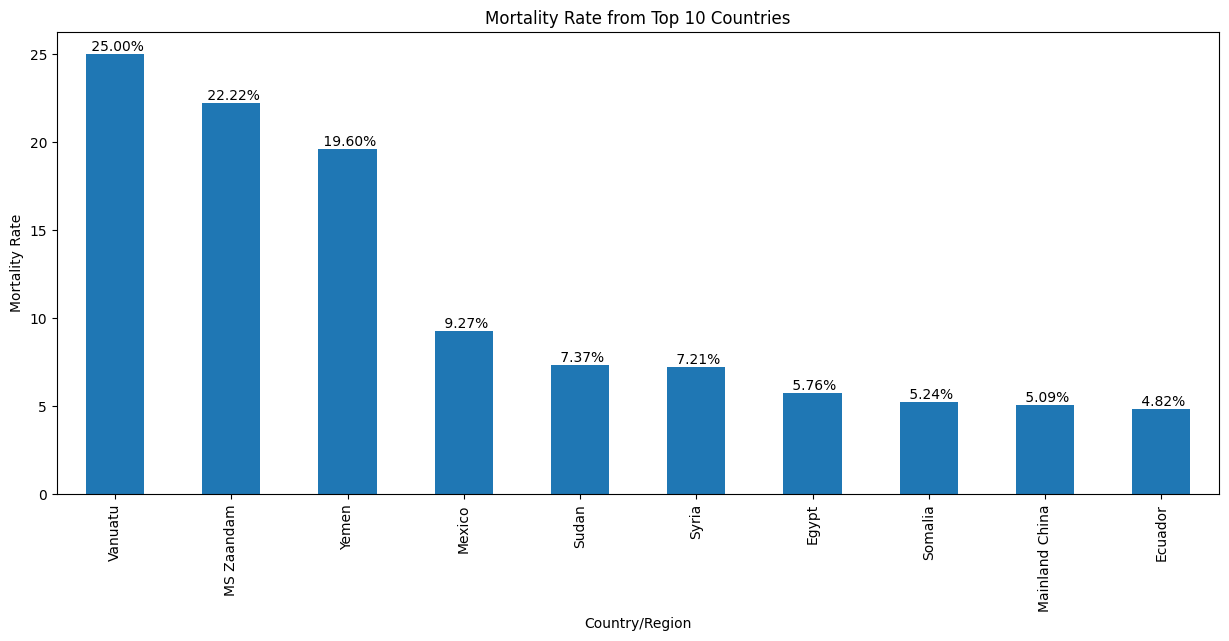

In [52]:
ax = (df_countries.sort_values('Mortality Rate', ascending=False).head(10)['Mortality Rate']*100).plot(kind='bar', figsize=(15,6))

ax.bar_label(ax.containers[-1], fmt = ' %.2f%%')

plt.xlabel('Country/Region')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate from Top 10 Countries')

plt.show()

Berdasarkan Bar plot di atas, didapat bahwa negara-negara yang cenderung memiliki ekonomi dan stabilitas negara yang rendah mengalami tingkat kematian dari COVID-19 yang lebih tinggi.